TRANSFORMATION

In [10]:
from numpy import sum
from pandas import DataFrame, Series, read_csv
from matplotlib.pyplot import figure, show
from dslabs_functions import HEIGHT, plot_line_chart
from matplotlib.pyplot import savefig
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import figure, show
from dslabs_functions import plot_line_chart, ts_aggregation_by, HEIGHT
from numpy import arange
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import savefig
from sklearn.linear_model import LinearRegression
from dslabs_functions import series_train_test_split, plot_forecasting_eval
import pandas as pd
from sklearn.model_selection import train_test_split

file_tag = "forecast-traffic-transformation"
filename = "datasets/forecast_traffic_single.csv"
index = "Timestamp"
target = "Total"
data: DataFrame = read_csv(
    filename,
    index_col=index,
    sep=",",
    parse_dates=True,
    infer_datetime_format=True,
)
series: Series = data[target]

AGGREGATION

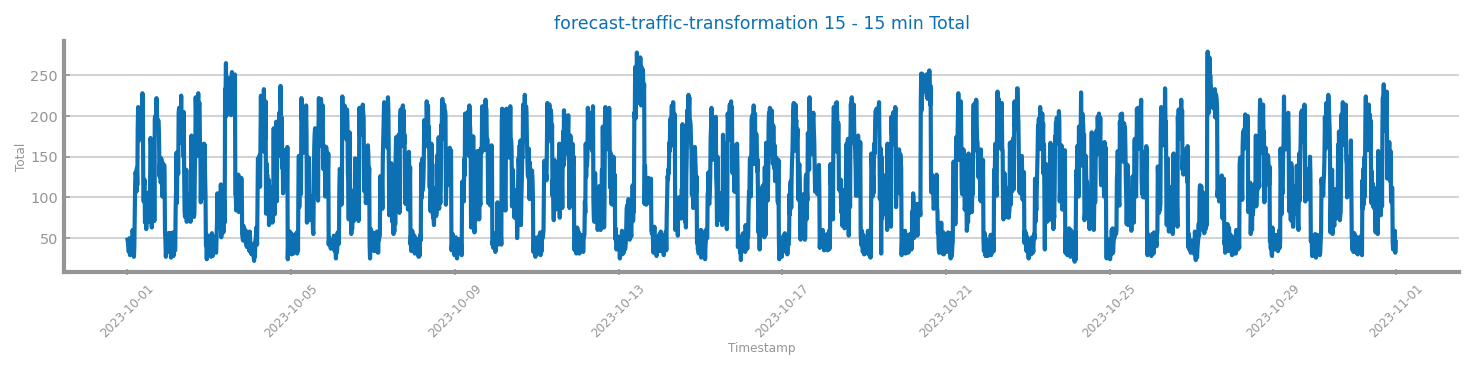

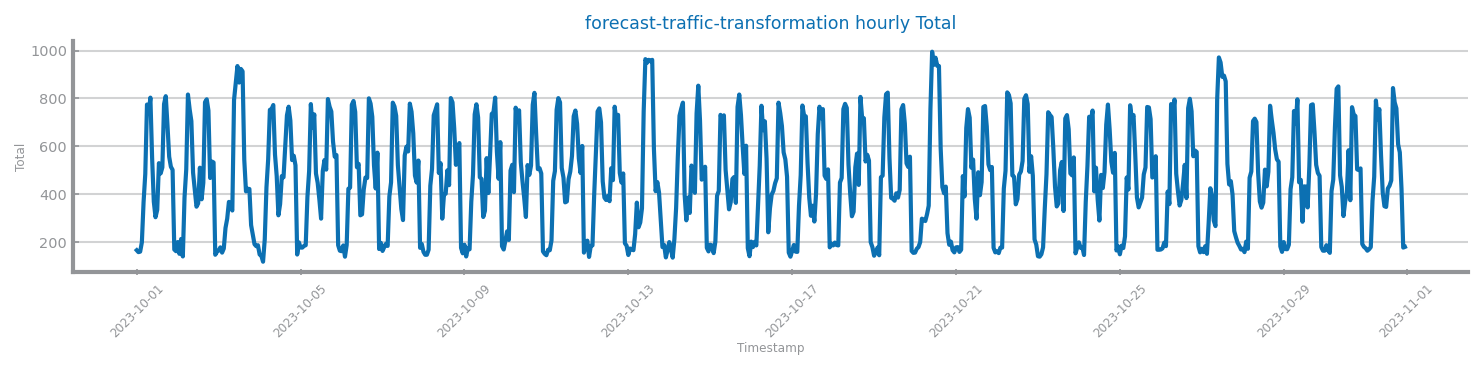

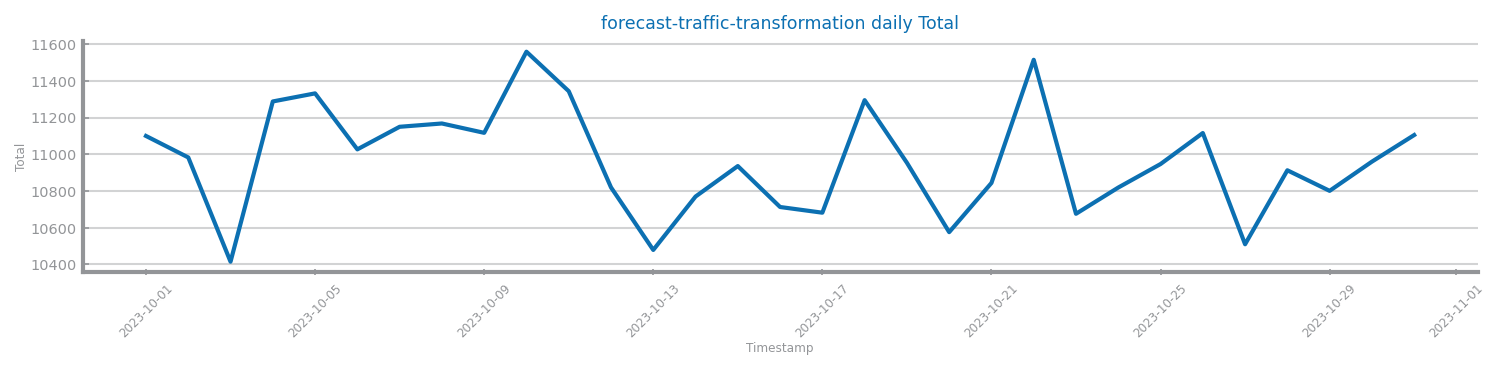

In [11]:
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel=series.index.name,
    ylabel=target,
    title=f"{file_tag} 15 - 15 min {target}",
)
savefig(f"images/forecast/{file_tag}_agg_total.png")
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
ss_agg_h: Series = ts_aggregation_by(series, gran_level="H", agg_func="sum")
ss_agg_h_df: DataFrame = ts_aggregation_by(data, gran_level="H", agg_func="sum")

plot_line_chart(
    ss_agg_h.index.to_list(),
    ss_agg_h.to_list(),
    xlabel=ss_agg_h.index.name,
    ylabel=target,
    title=f"{file_tag} hourly {target}",
)

savefig(f"images/forecast/{file_tag}_agg_hourly.png")
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
ss_agg_d: Series = ts_aggregation_by(series, gran_level="D", agg_func="sum")
ss_agg_d_df: DataFrame = ts_aggregation_by(data, gran_level="D", agg_func="sum")
plot_line_chart(
    ss_agg_d.index.to_list(),
    ss_agg_d.to_list(),
    xlabel=ss_agg_d.index.name,
    ylabel=target,
    title=f"{file_tag} daily {target}",
)
savefig(f"images/forecast/{file_tag}_agg_daily.png")
show()

Linear Regression Aggregation

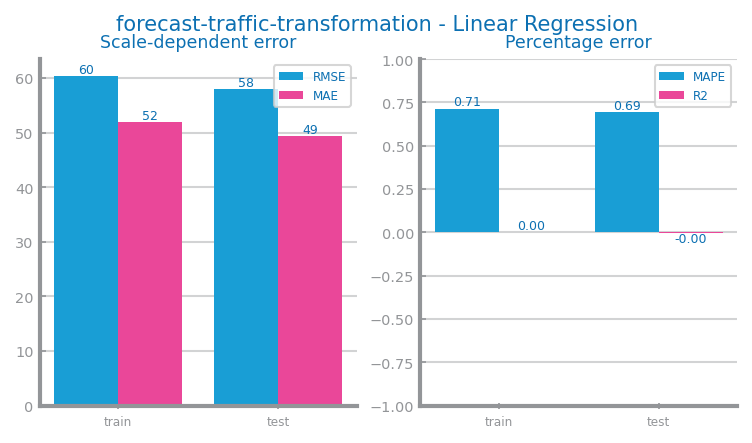

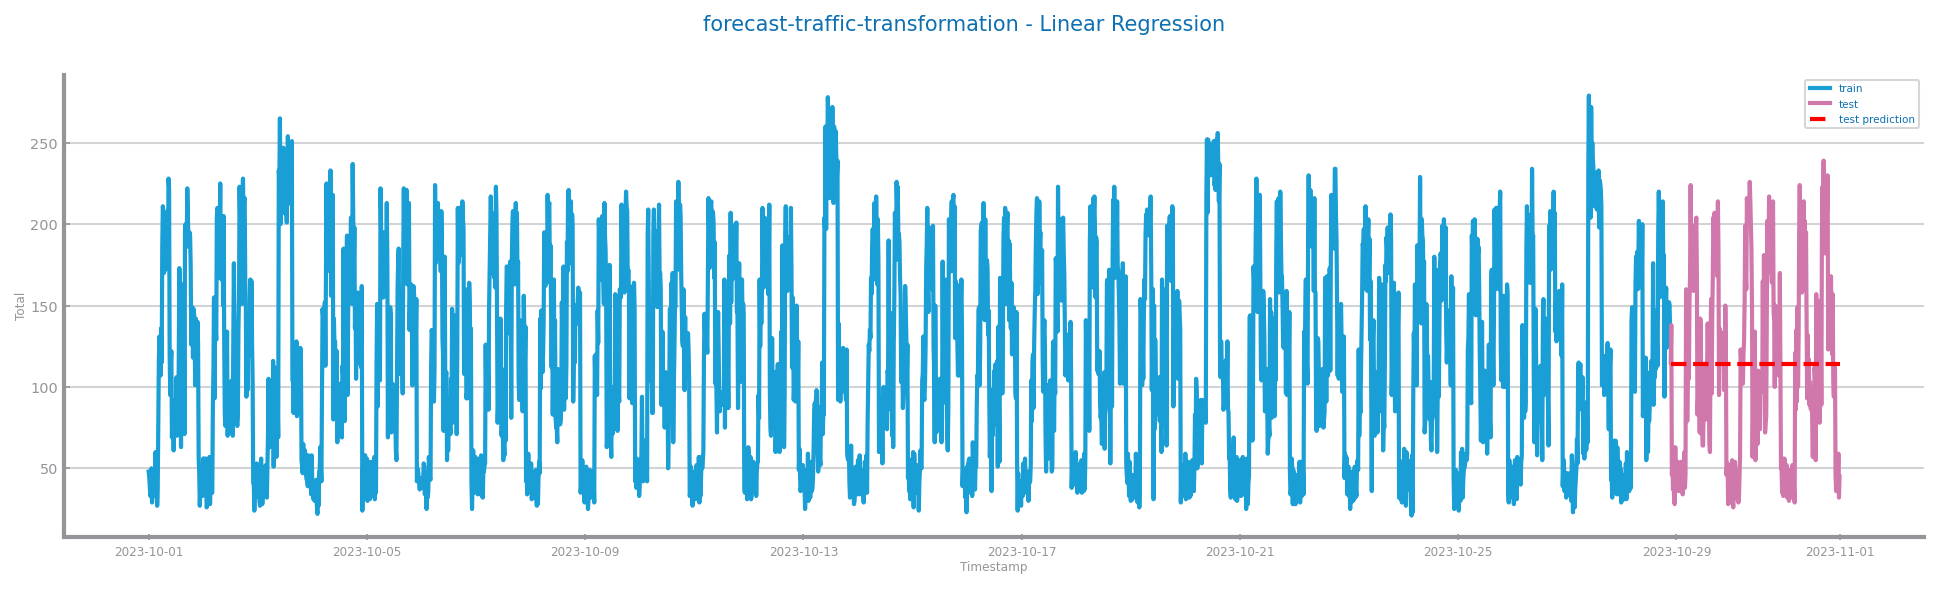

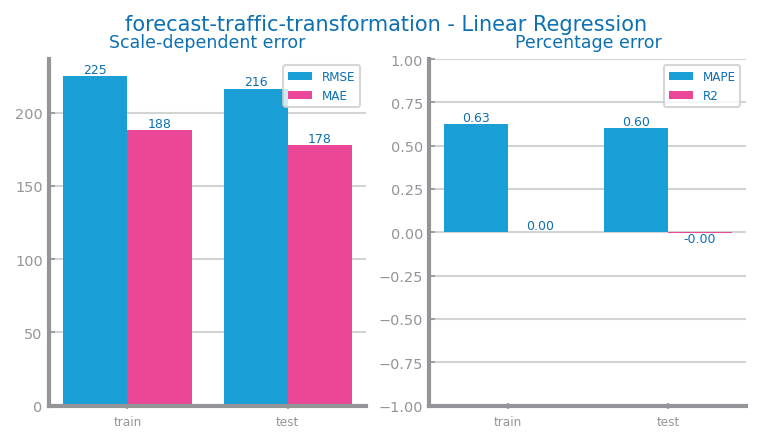

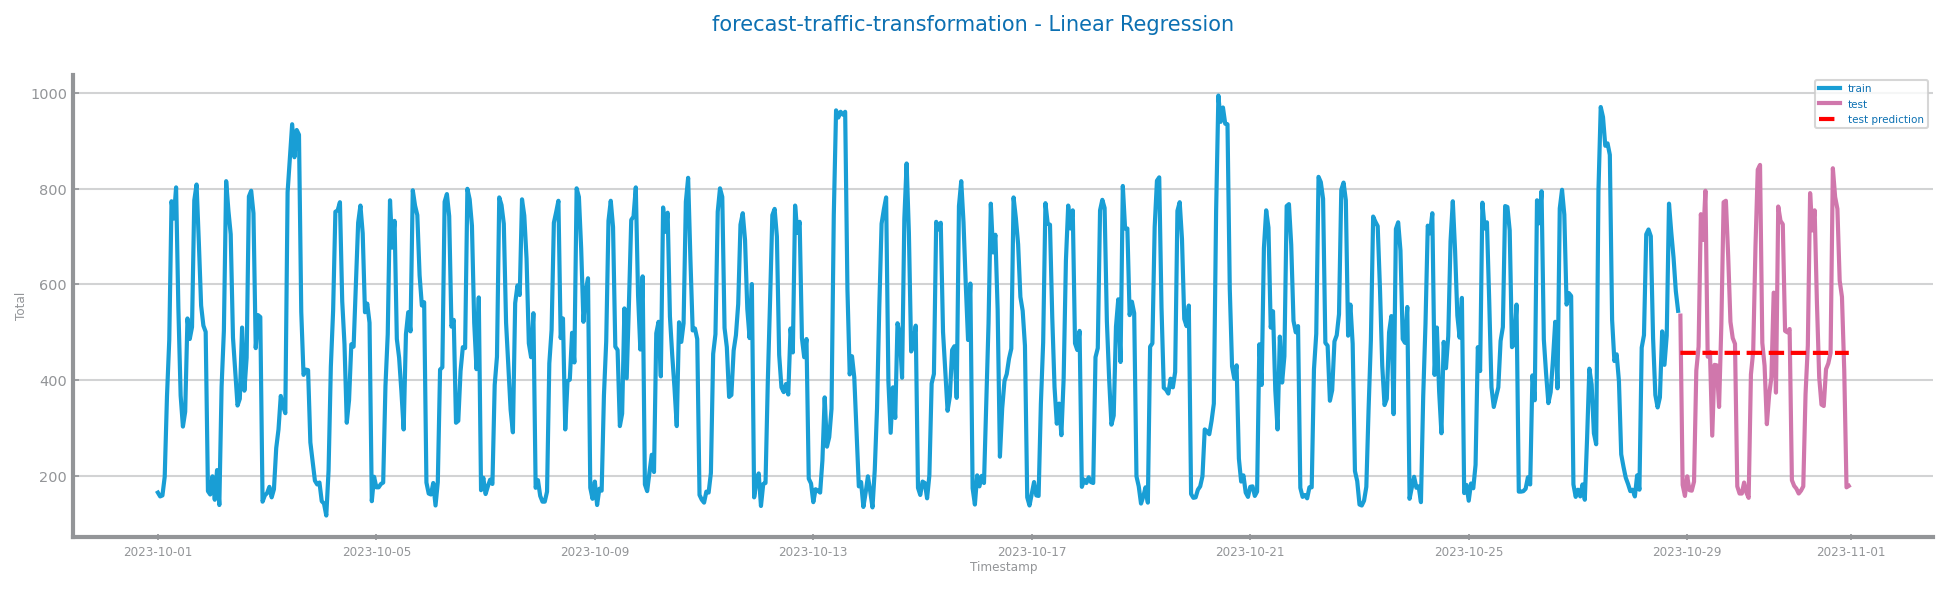

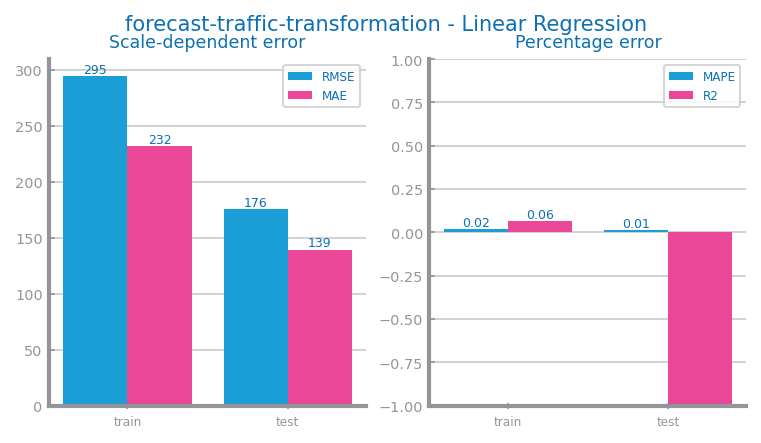

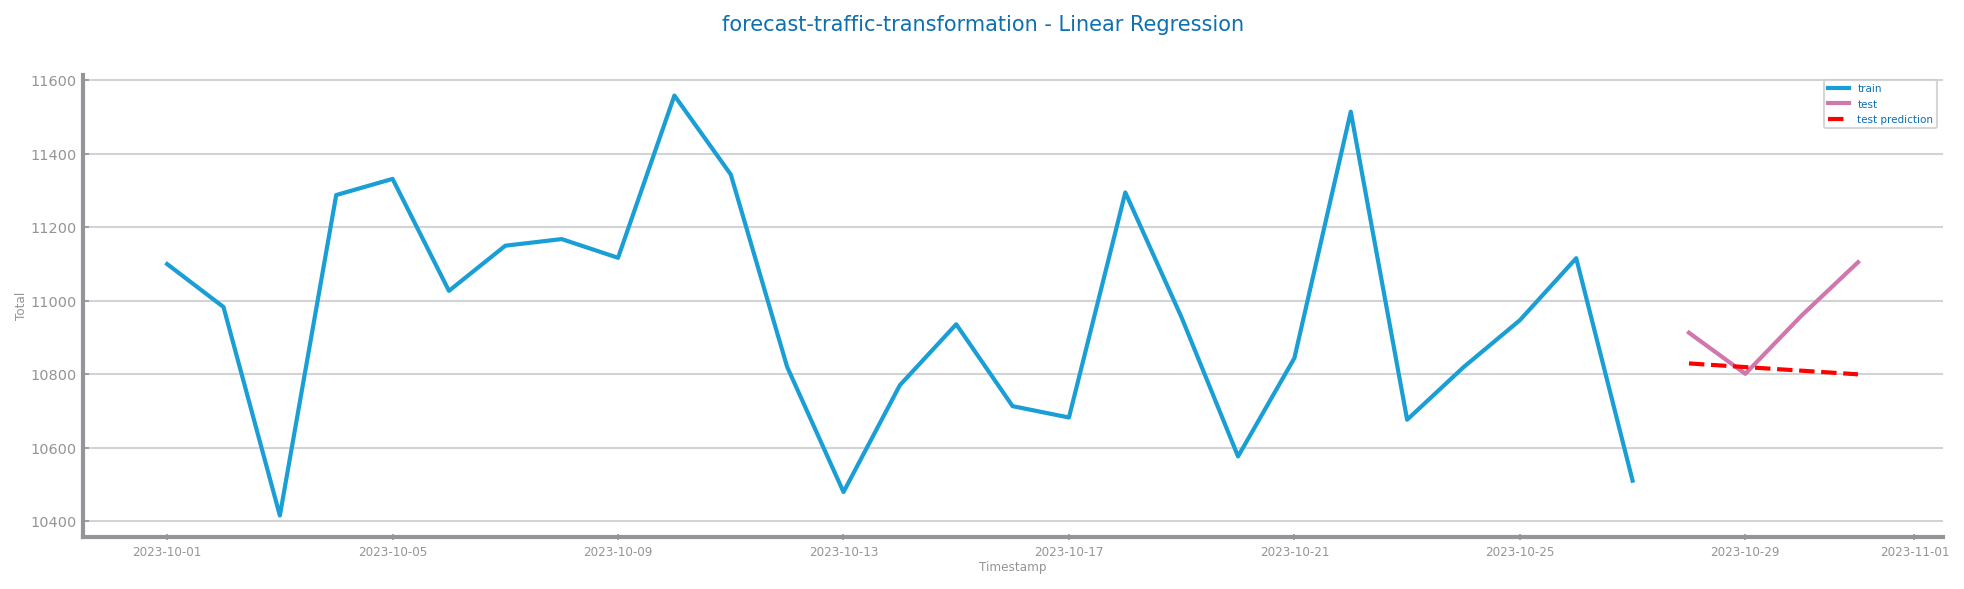

In [15]:
lst = [data, ss_agg_h_df, ss_agg_d_df]
names = ["15-15", "hour", "day"]
for i in range(len(lst)):
    d = lst[i]
    train, test = series_train_test_split(d, trn_pct=0.90)

    trnX = arange(len(train)).reshape(-1, 1)
    trnY = train.to_numpy()
    tstX = arange(len(train), len(d)).reshape(-1, 1)
    tstY = test.to_numpy()

    model = LinearRegression()
    model.fit(trnX, trnY)

    prd_trn: Series = Series(model.predict(trnX), index=train.index)
    prd_tst: Series = Series(model.predict(tstX), index=test.index)

    plot_forecasting_eval(train, test, prd_trn, prd_tst, title=f"{file_tag} - Linear Regression")
    savefig(f"images/forecast/{file_tag}_linear_regression_eval_aggregation_{names[i]}.png")

    from dslabs_functions import plot_forecasting_series

    plot_forecasting_series(
        train,
        test,
        prd_tst,
        title=f"{file_tag} - Linear Regression",
        xlabel=index,
        ylabel=target,
    )
    savefig(f"images/forecast/{file_tag}_linear_regression_forecast_aggregation_{names[i]}.png")


SMOOTHING

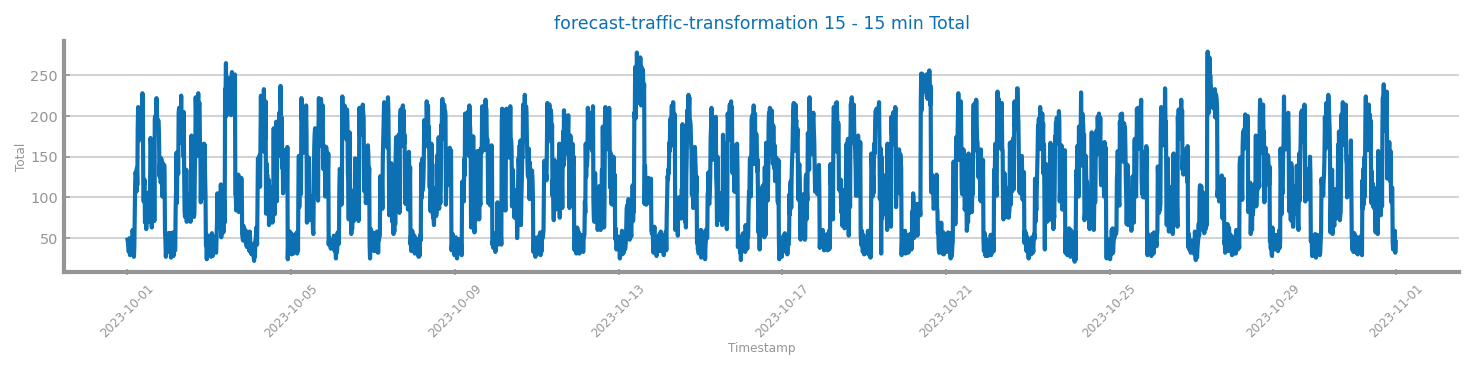

In [20]:
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel=series.index.name,
    ylabel=target,
    title=f"{file_tag} 15 - 15 min {target}",
)
show()


ss_smooth_5 : DataFrame = data.rolling(window=5).mean()
ss_smooth_10 : DataFrame = data.rolling(window=10).mean()
ss_smooth_25 : DataFrame = data.rolling(window=25).mean()
ss_smooth_50 : DataFrame = data.rolling(window=50).mean()

ss_smooth_75 : DataFrame = data.rolling(window=75).mean()
ss_smooth_100: DataFrame = data.rolling(window=100).mean()
ss_smooth_5 = ss_smooth_5.dropna()
ss_smooth_10 = ss_smooth_10.dropna()
ss_smooth_25 = ss_smooth_25.dropna()
ss_smooth_50 = ss_smooth_50.dropna()
ss_smooth_75 = ss_smooth_75.dropna()
ss_smooth_100 = ss_smooth_100.dropna()
common_index = ss_smooth_5.index.intersection(ss_smooth_100.index)
ss_smooth_5 = ss_smooth_5.loc[common_index]
ss_smooth_10 = ss_smooth_10.loc[common_index]
ss_smooth_25 = ss_smooth_25.loc[common_index]
ss_smooth_50 = ss_smooth_50.loc[common_index]
ss_smooth_75 = ss_smooth_75.loc[common_index]
ss_smooth_100 = ss_smooth_100.loc[common_index]


datas = [ss_smooth_5,ss_smooth_10,ss_smooth_25,ss_smooth_50, ss_smooth_75, ss_smooth_100]
names = ["5","10","25","50", "75", "100"]

show()

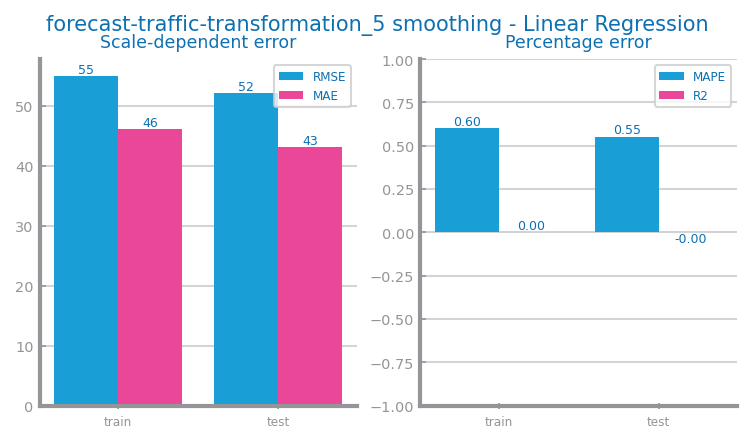

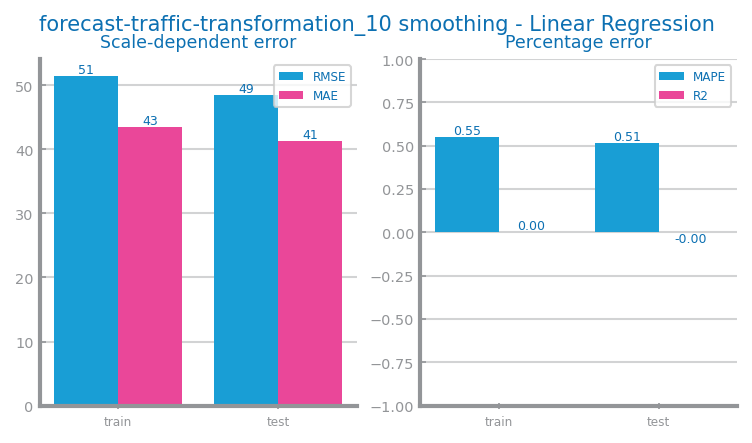

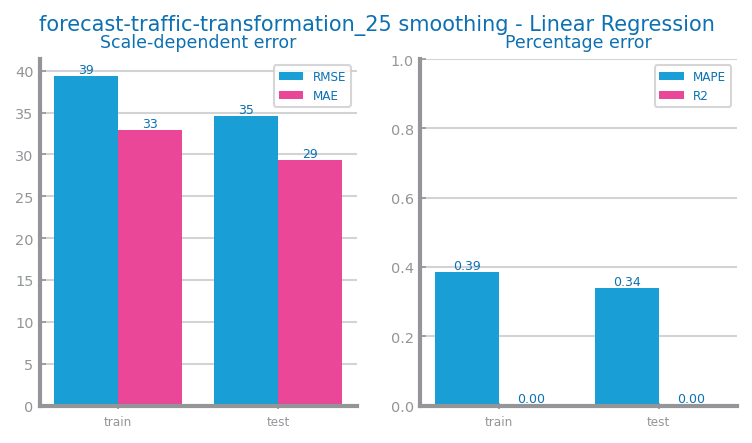

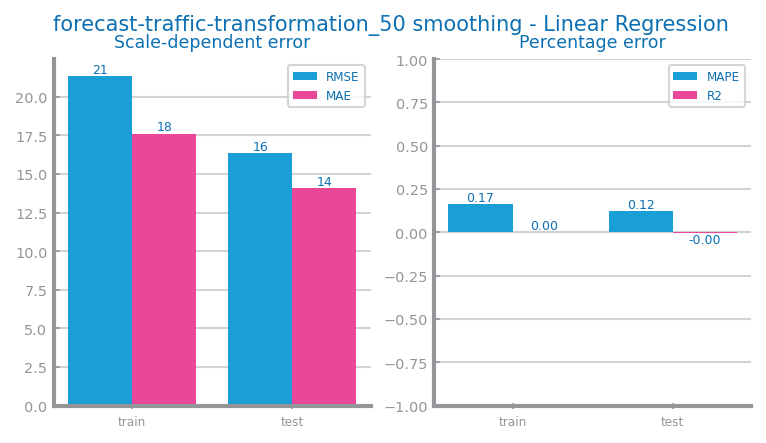

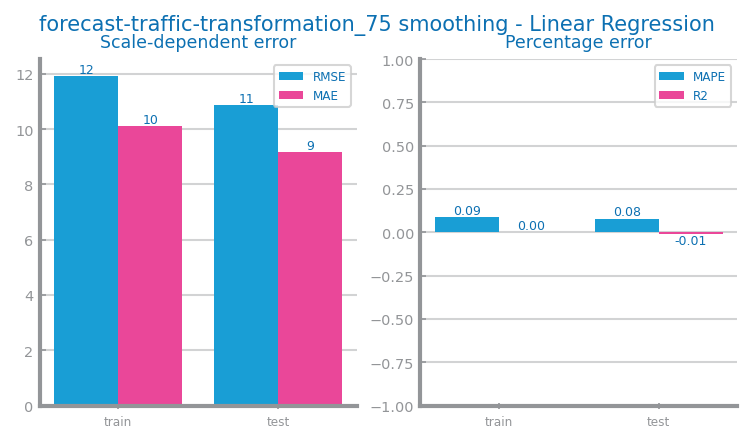

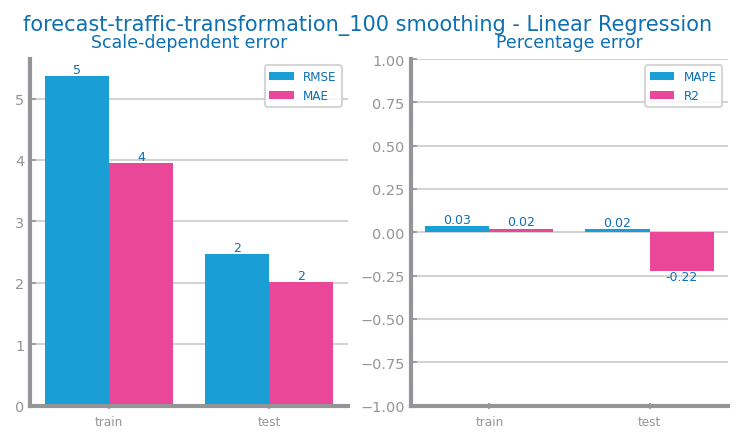

In [21]:
for dataframe, name in zip(datas, names):
    train, test = series_train_test_split(dataframe, trn_pct=0.90)
    trnX = arange(len(train)).reshape(-1, 1)
    trnY = train.to_numpy()
    tstX = arange(len(train), len(dataframe)).reshape(-1, 1)
    tstY = test.to_numpy()

    model = LinearRegression()
    model.fit(trnX, trnY)

    prd_trn: Series = Series(model.predict(trnX), index=train.index)
    prd_tst: Series = Series(model.predict(tstX), index=test.index)

    plot_forecasting_eval(train, test, prd_trn, prd_tst, title=f"{file_tag}_{name} smoothing - Linear Regression")
    
    savefig(f"images/forecast/{file_tag}_linear_regression_forecast_smoothing_win_size_{name}.png")

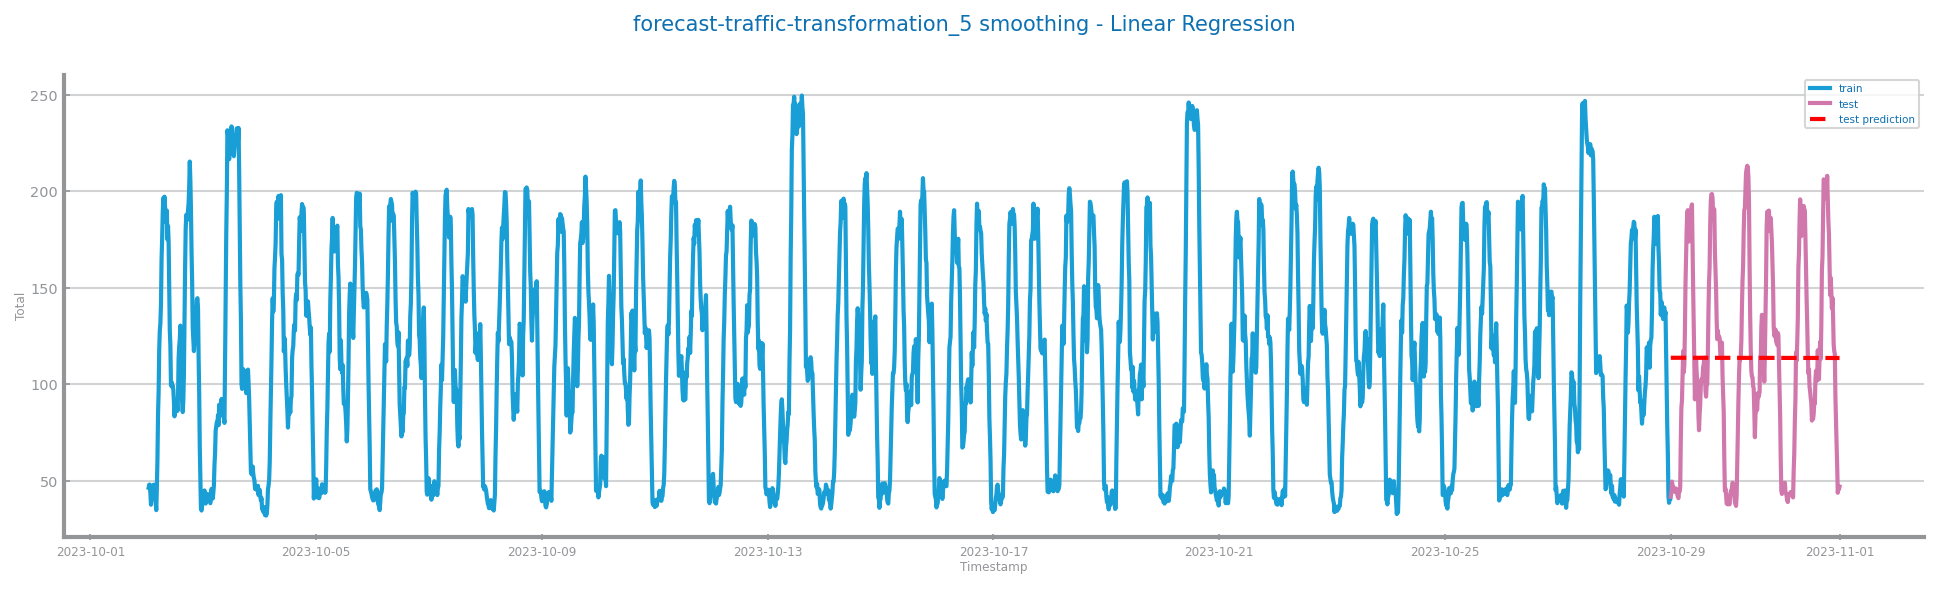

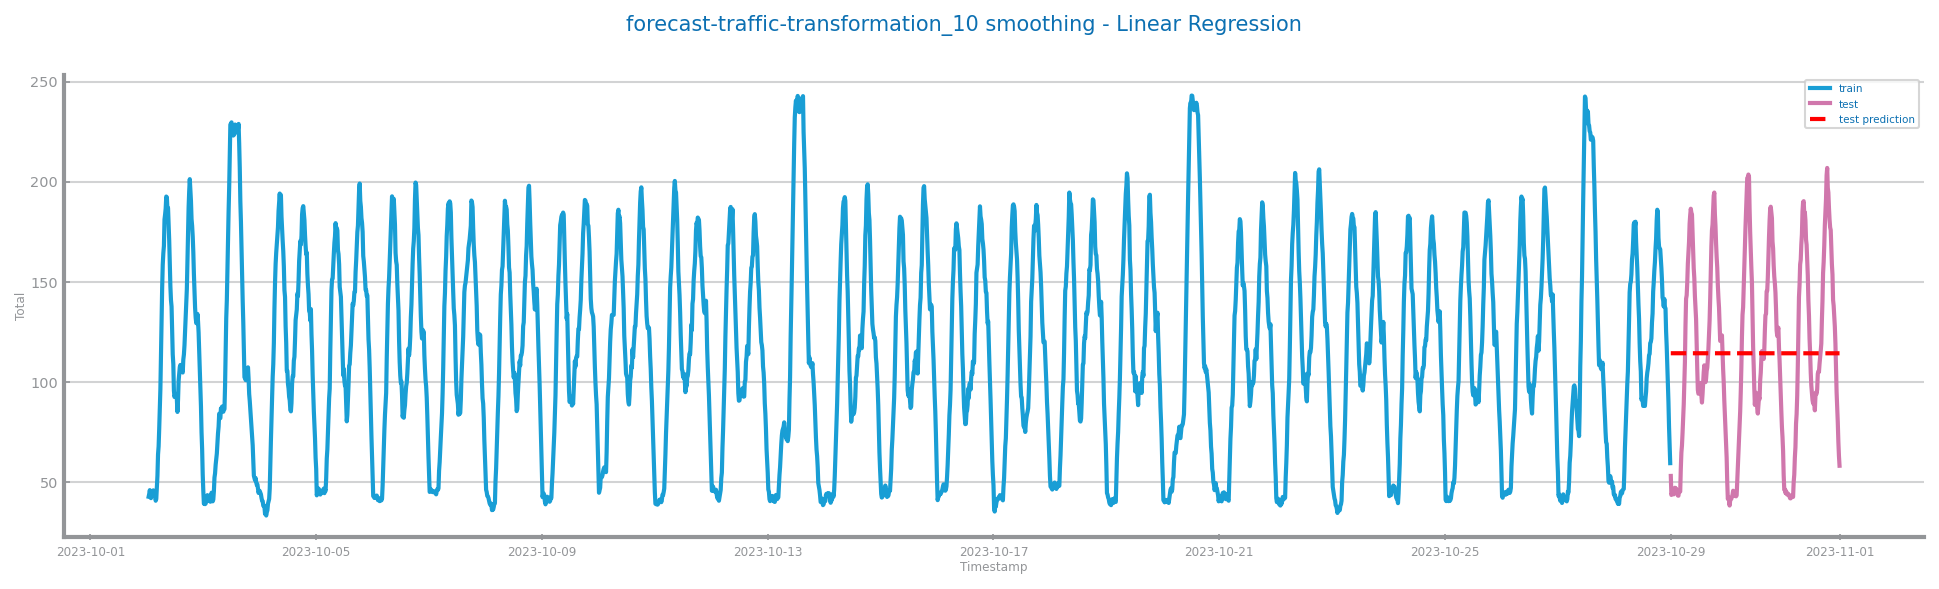

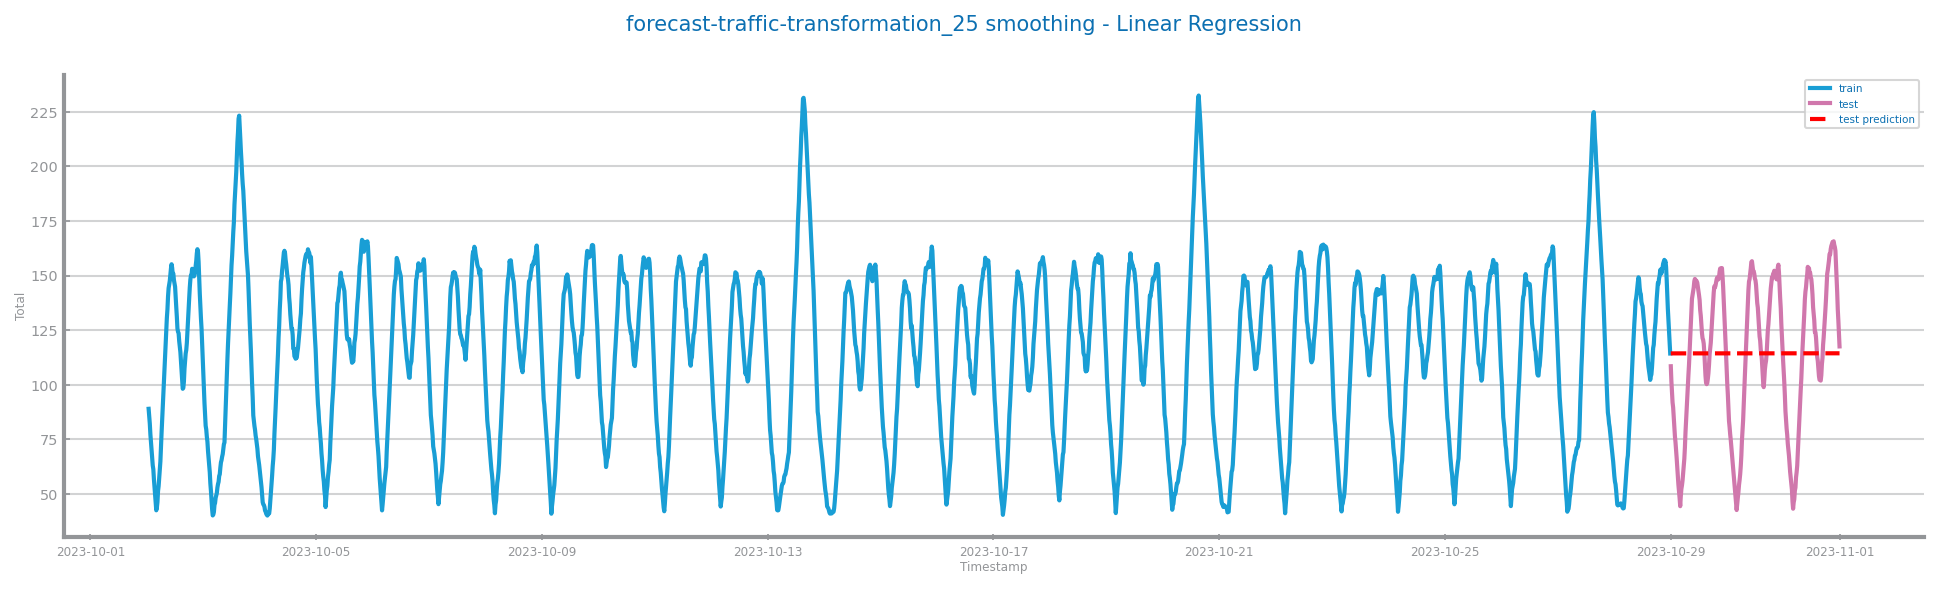

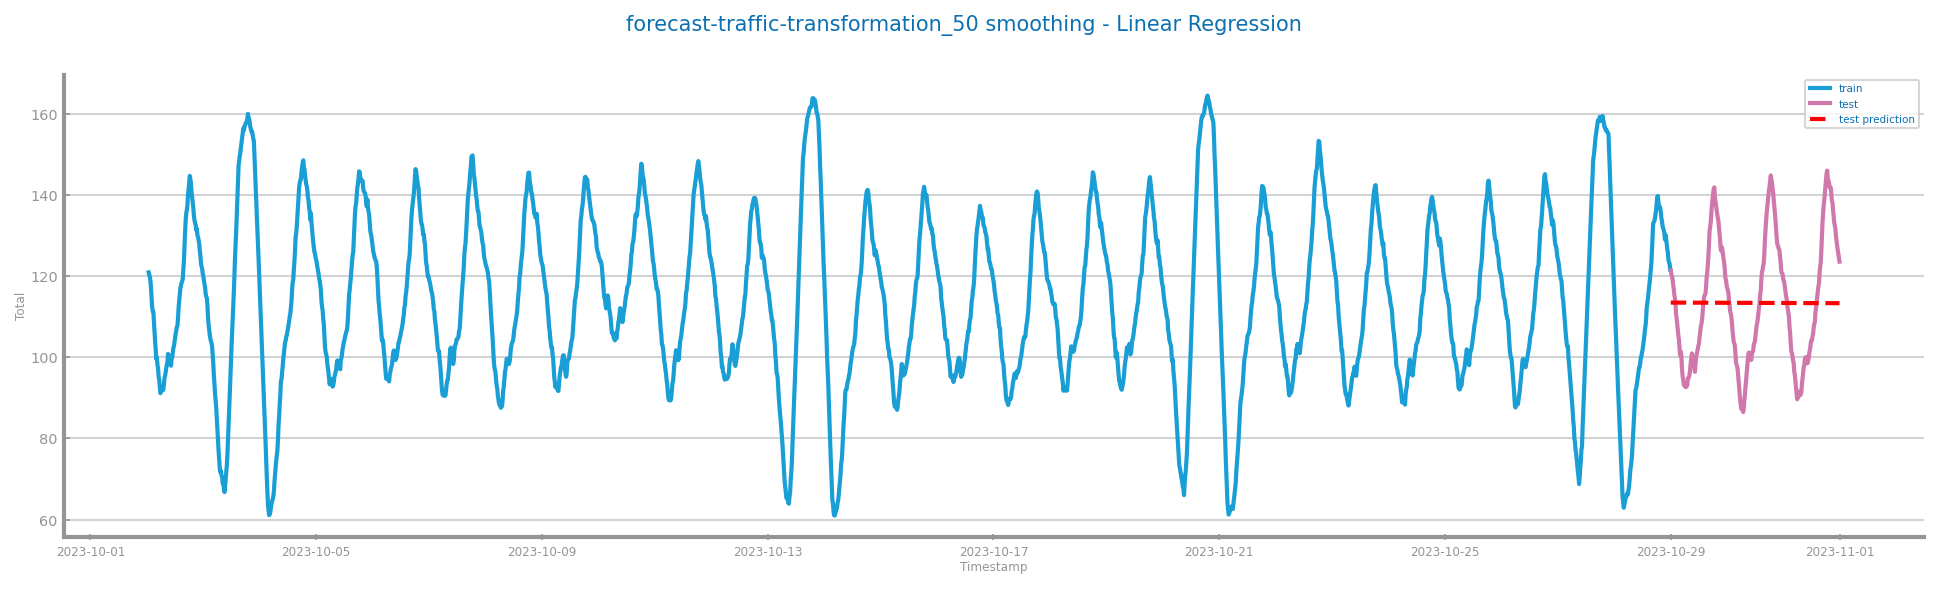

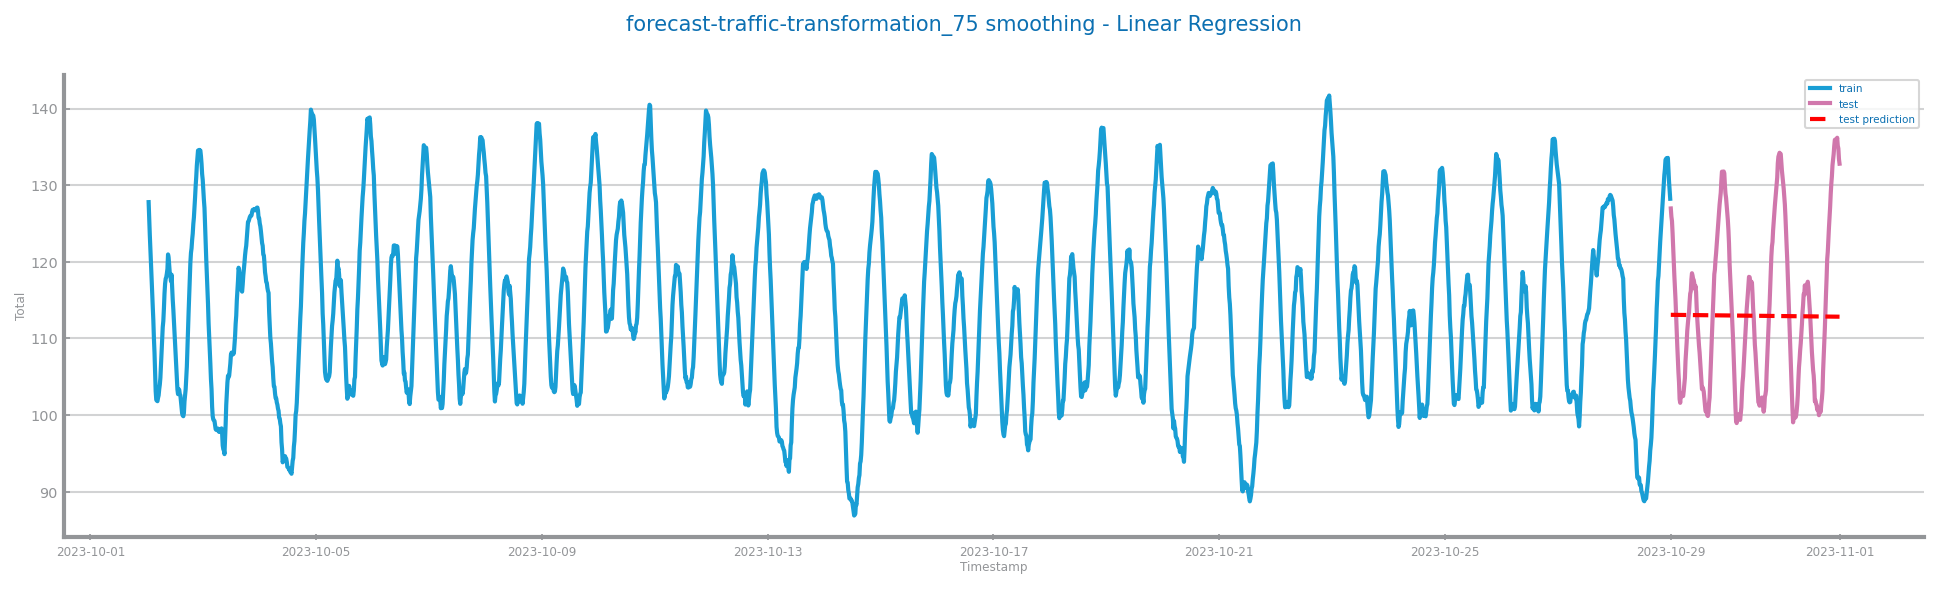

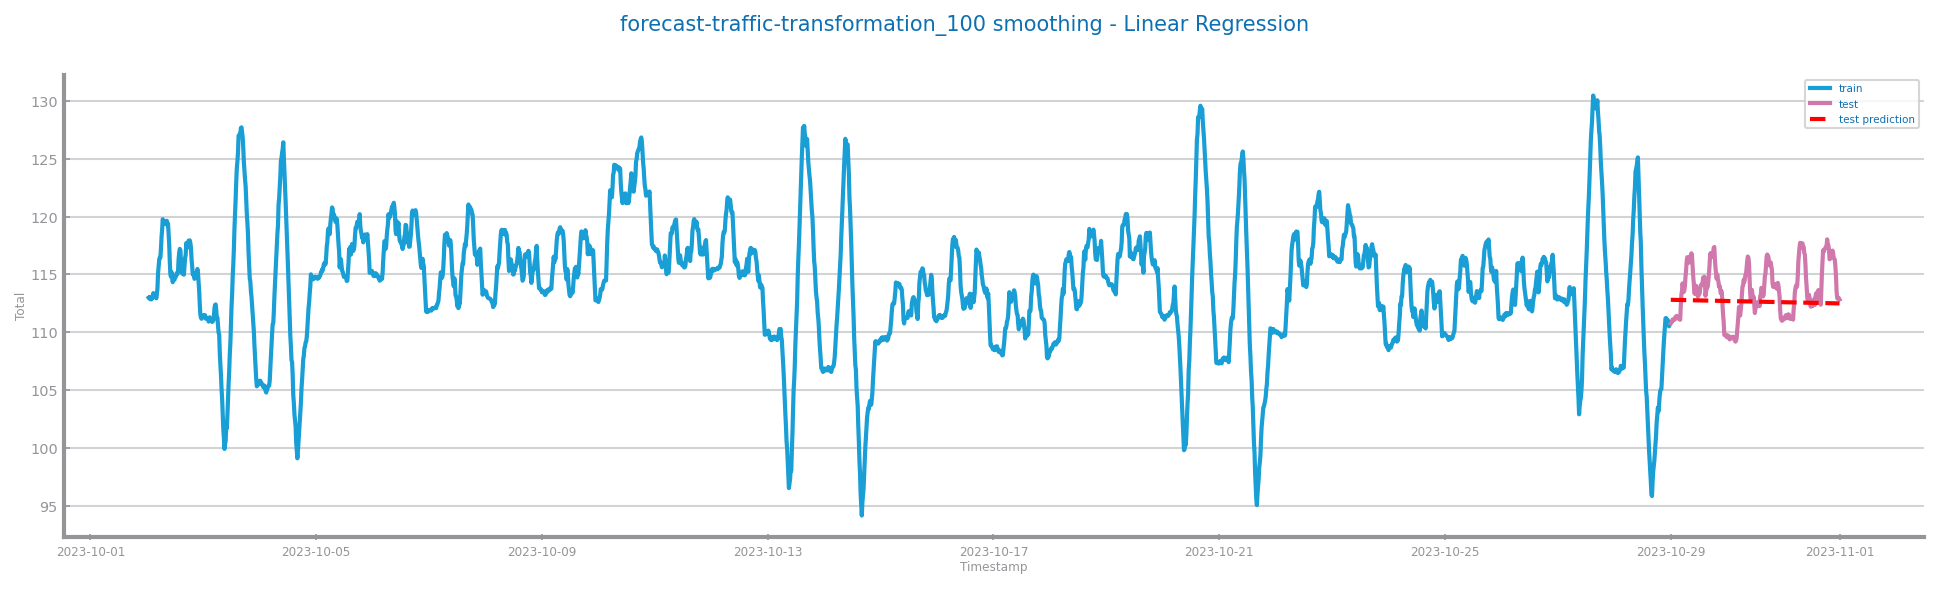

In [22]:
for dataframe, name in zip(datas, names):
    train, test = series_train_test_split(dataframe, trn_pct=0.90)
    trnX = arange(len(train)).reshape(-1, 1)
    trnY = train.to_numpy()
    tstX = arange(len(train), len(dataframe)).reshape(-1, 1)
    tstY = test.to_numpy()

    model = LinearRegression()
    model.fit(trnX, trnY)

    prd_trn: Series = Series(model.predict(trnX), index=train.index)
    prd_tst: Series = Series(model.predict(tstX), index=test.index)
    plot_forecasting_series(
        train,
        test,
        prd_tst,
        title=f"{file_tag}_{name} smoothing - Linear Regression",
        xlabel=series.index.name,
        ylabel=target,
    )
    savefig(f"images/forecast/{file_tag}_{name}_data_transformation_smoothing_linear_regression_forecast.png")

Differentiation

In [30]:
data = ss_smooth_100
ss_diff_0 : DataFrame = data
ss_diff : DataFrame = data.diff()
ss_diff_2 : DataFrame = ss_diff.diff()
ss_diff = ss_diff.dropna()
ss_diff_2 = ss_diff_2.dropna()
common_index = ss_diff_2.index.intersection(ss_diff_0.index)
ss_diff_0 = ss_diff_0.loc[common_index]
ss_diff = ss_diff.loc[common_index]
datas = [ss_diff_0,ss_diff,ss_diff_2]
names = ["0","1","2"]

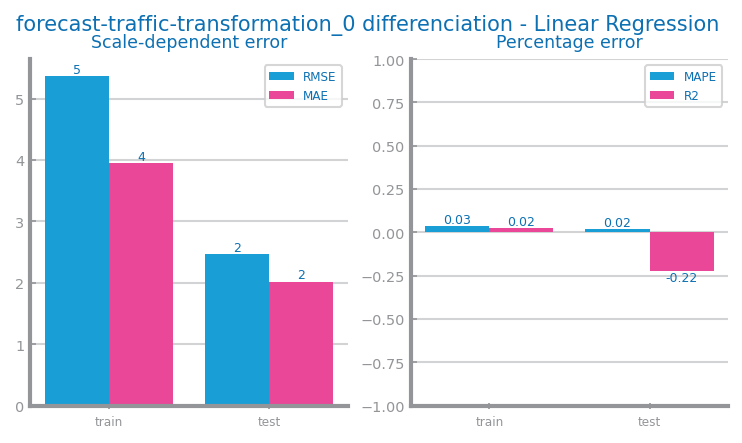

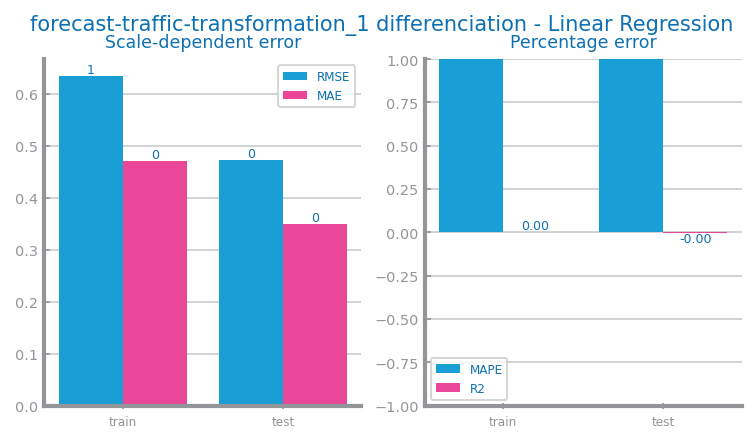

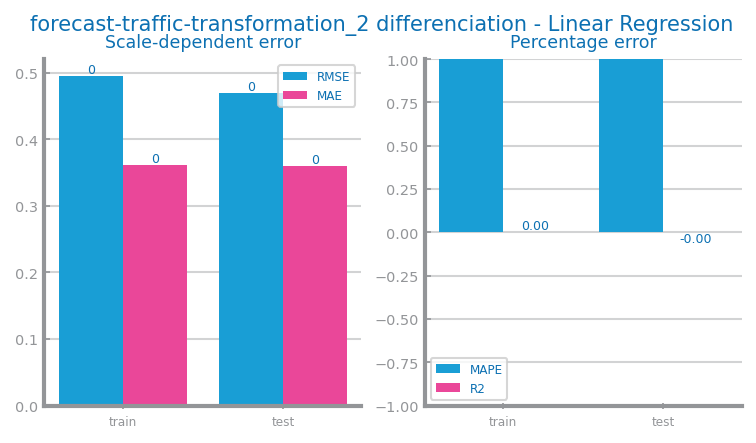

In [31]:
for dataframe, name in zip(datas, names):
    train, test = series_train_test_split(dataframe, trn_pct=0.90)
    trnX = arange(len(train)).reshape(-1, 1)
    trnY = train.to_numpy()
    tstX = arange(len(train), len(dataframe)).reshape(-1, 1)
    tstY = test.to_numpy()

    model = LinearRegression()
    model.fit(trnX, trnY)

    prd_trn: Series = Series(model.predict(trnX), index=train.index)
    prd_tst: Series = Series(model.predict(tstX), index=test.index)

    plot_forecasting_eval(train, test, prd_trn, prd_tst, title=f"{file_tag}_{name} differenciation - Linear Regression")
    savefig(f"images/forecast/{file_tag}_{name}_data_transformation_differentiation_linear_regression_eval.png")

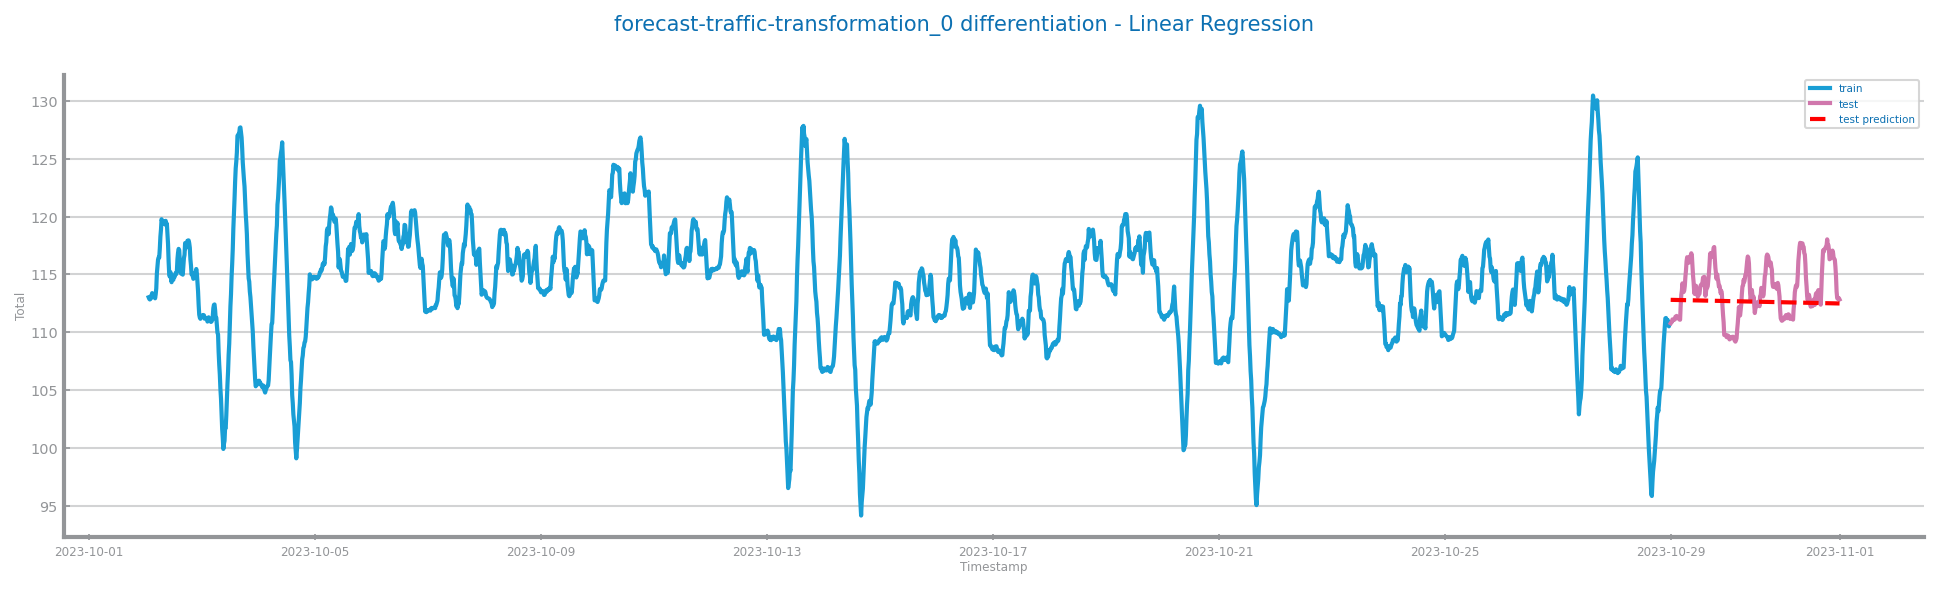

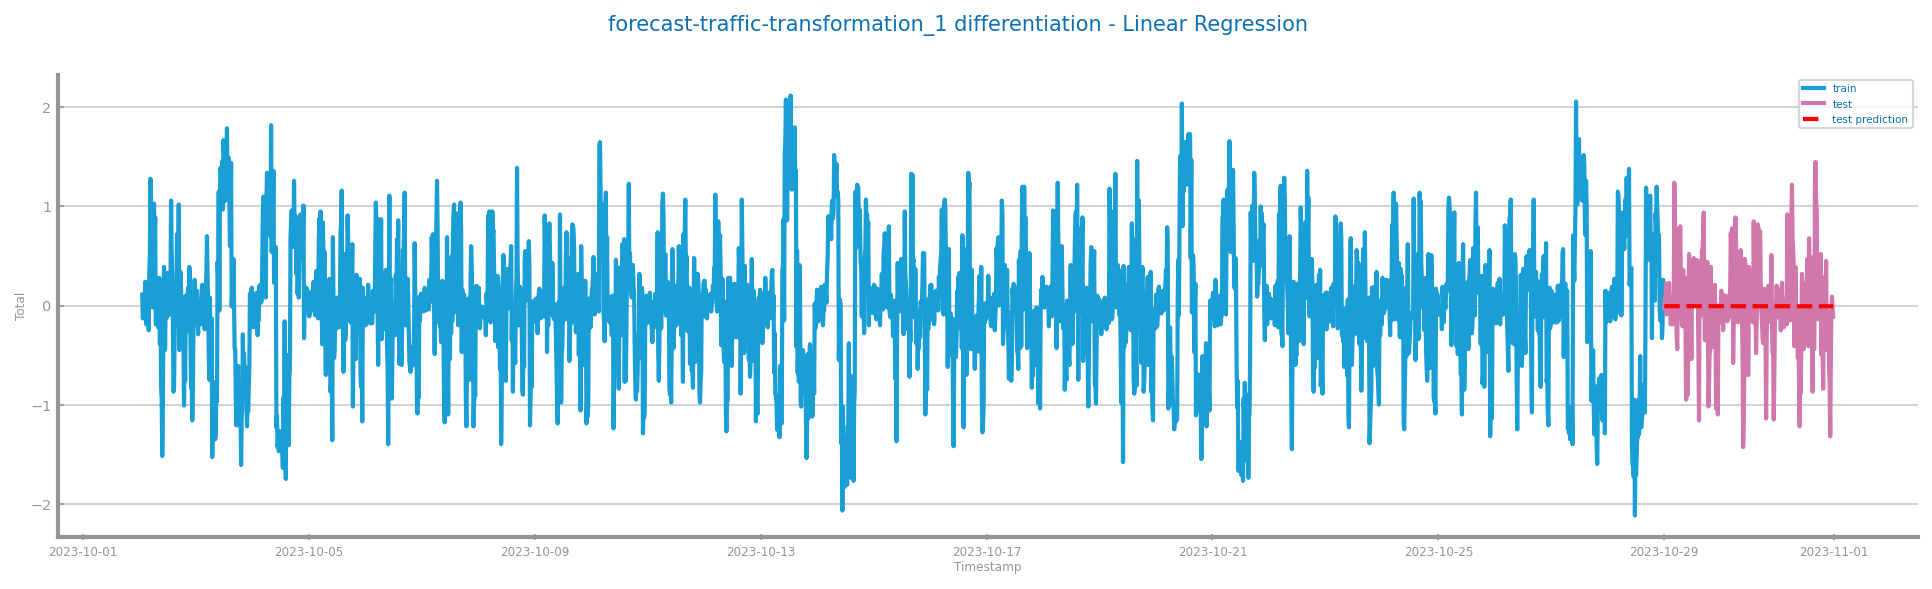

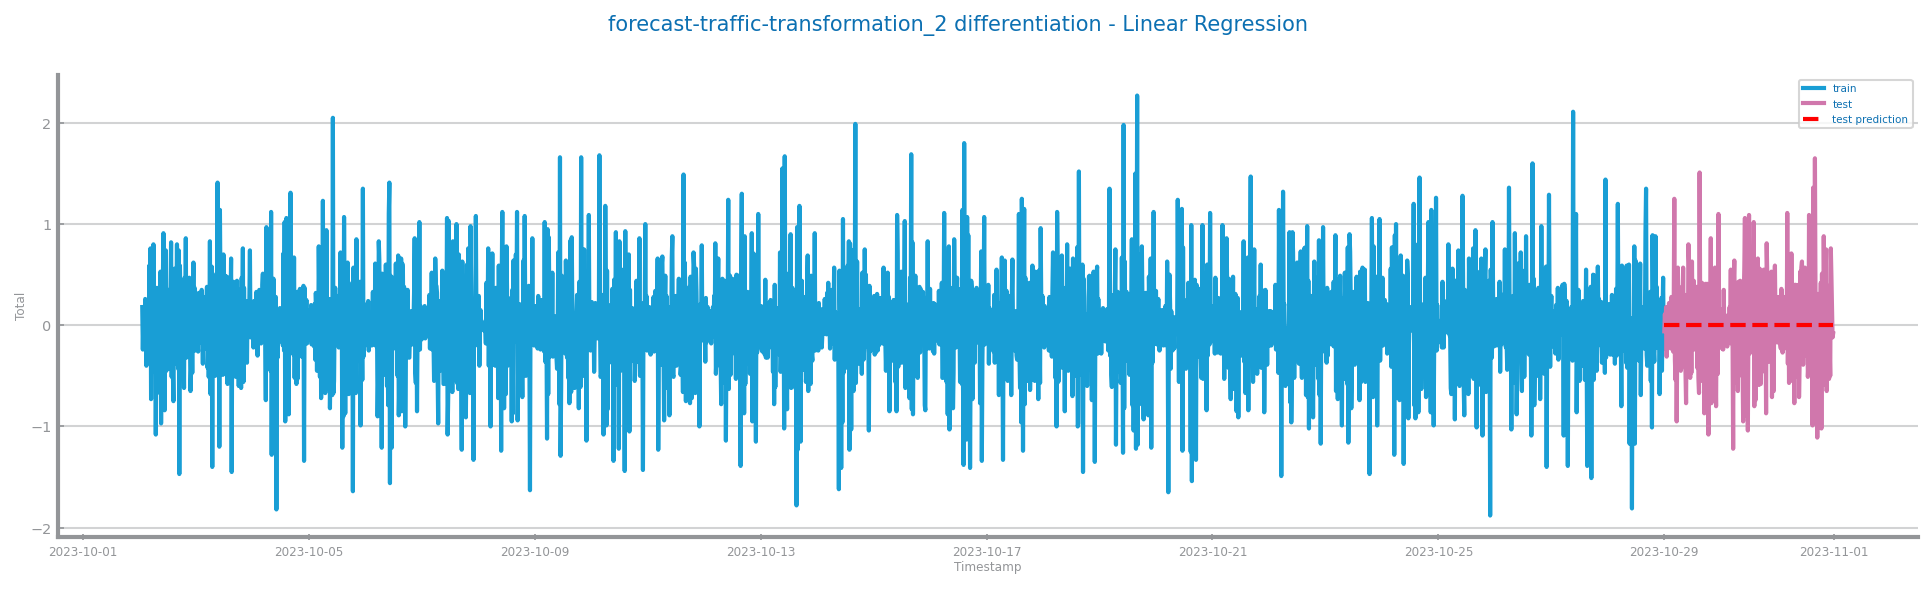

In [32]:
for dataframe, name in zip(datas, names):
    train, test = series_train_test_split(dataframe, trn_pct=0.90)
    trnX = arange(len(train)).reshape(-1, 1)
    trnY = train.to_numpy()
    tstX = arange(len(train), len(dataframe)).reshape(-1, 1)
    tstY = test.to_numpy()

    model = LinearRegression()
    model.fit(trnX, trnY)

    prd_trn: Series = Series(model.predict(trnX), index=train.index)
    prd_tst: Series = Series(model.predict(tstX), index=test.index)
    plot_forecasting_series(
        train,
        test,
        prd_tst,
        title=f"{file_tag}_{name} differentiation - Linear Regression",
        xlabel=series.index.name,
        ylabel=target,
    )
    savefig(f"images/forecast/{file_tag}_{name}_data_transformation_differentiation_linear_regression_forecast.png")